#### 1.引入依赖

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 引入sklearn中直接生成聚类数据
from sklearn.datasets.samples_generator import make_blobs

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


#### 2.数据加载

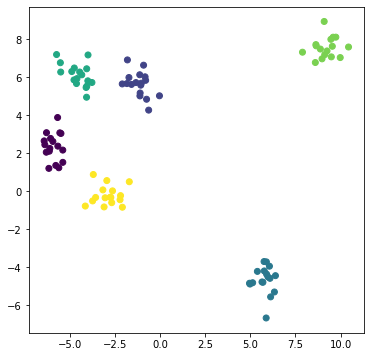

In [8]:
# 随机生成数据
x, y = make_blobs(n_samples = 100, centers = 6, random_state = 1234, cluster_std = 0.6 )
plt.figure(figsize = (6, 6))
plt.scatter(x[:,0], x[:,1], c=y)

#### 3.算法实现

In [15]:
# 引入scipy中的距离函数，默认为欧式距离
from scipy.spatial.distance import cdist

class K_Means(object):
    # 初始化
    def __init__(self, n_clusters = 6, max_iter = 300, centroids = []):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = np.array(centroids, dtype = np.float)
    
    # 训练方法
    def fit(self, data):
        # 若没有初始质心，则随机选取质心
        if (self.centroids.shape == (0,)):
            self.centroids = data[np.random.randint(0, data.shape[0], self.n_clusters), :]
        
        # 开始迭代
        for i in range(self.max_iter):
            # 计算距离矩阵，得到每个点到每个质心点的距离
            distances = cdist(data, self.centroids)
            # 对距离由近到远排序，选取最近的质心点，归类
            c_ind = np.argmin( distances, axis = 1)
            # 对每一类数据进行均值计算，更新质心点坐标
            for i in range(self.n_clusters):
                # 排除掉没有出现在c_ind里的类别
                if i in c_ind:
                    # 选出所有类别是i的点，取data坐标求均值，更新第i个质心
                    self.centroids[i] = np.mean(data[c_ind == i], axis = 0)
                    
    # 预测方法
    def predict(self, samples):
        distances = cdist(samples, self.centroids)
        c_ind = np.argmin( distances, axis = 1)
        return c_ind

#### 4.测试

[1 5]


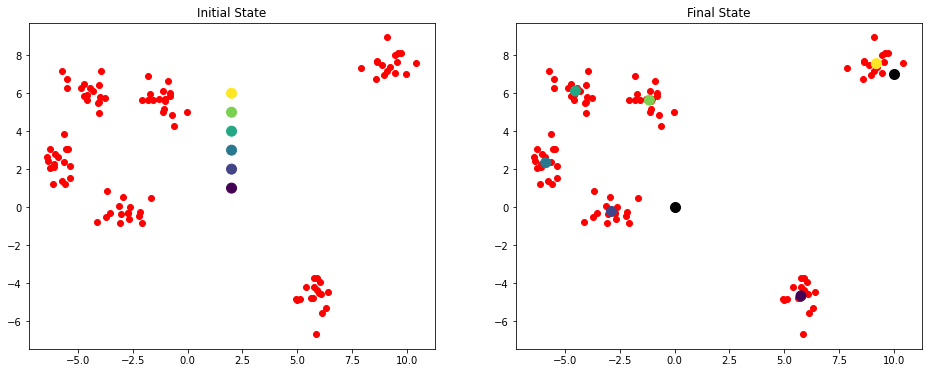

In [17]:
# 定义绘制子图函数, subplot子图分配参数
def plotKMeans(x, y, centroids, subplot, title):
    # 分配子图
    plt.subplot(subplot)
    plt.scatter(x[:, 0], x[:, 1], c = 'r')
    # 画出初始质心
    plt.scatter(centroids[:, 0], centroids[:, 1], c = np.array(range(6)), s = 100)
    plt.title(title)
    
kmeans = K_Means(max_iter = 300, centroids = np.array([[2,1],[2,2],[2,3],[2,4],[2,5],[2,6]]))

plt.figure(figsize = (16, 6))
# 121表示一行两列子图集中第一个
plotKMeans(x, y, kmeans.centroids, 121, 'Initial State')
# 执行聚类
kmeans.fit(x)
plotKMeans(x, y, kmeans.centroids, 122, 'Final State')

# 判断新数据类别
x_new = np.array([[0,0],[10,7]])
y_pred = kmeans.predict(x_new)
print(y_pred)
plt.scatter(x_new[:,0], x_new[:, 1], s = 100, c = 'black')